In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
try:
    conn = psycopg2.connect(user="cohort17",
                            password="Cohort17Movies",
                            host="moviesdb.ce8d6g1pa5lm.us-east-1.rds.amazonaws.com",
                            port="5432",database="moviesdb")

    dbquery = "select * from modeling_data2"
    
    df = pd.read_sql_query(dbquery, conn)

except (Exception, psycopg2.Error) as error :
    print ("Error while fetching data from PostgreSQL", error)

finally:
    if(conn):
        conn.close()

In [3]:
pd.options.display.max_columns = 999
df.dropna(subset=['domesticgross'], inplace=True)
df.head()

,primarytitle,domesticgross,productionbudget,runtimeminutes,releasedate,g_rating,pg_rating,pg13_rating,r_rating,action,comedy,drama,adventure,biography,horror,crime,documentary,animation,romance,mystery,thriller,scifi,fantasy,family,threed,animallead,dysfunctionalfamily,africanamerican,marvelcomics,religious,talkinganimals,visualeffects,revenge,male_lead,matt_damon,nicolas_cage,owen_wilson,samuel_l_jackson,mark_wahlberg,adam_sandler,denzel_washington,dwayne_johnson,gerard_butler,george_clooney,ben_stiller,robert_de_niro,bruce_willis,will_smith,ben_affleck,will_ferrell,tom_hanks,tom_cruise,keanu_reeves,leonardo_dicaprio,jake_gyllenhaal,steve_carell,johnny_depp,matthew_mcconaughey,jason_statham,vin_diesel,robert_downey_jr,christian_bale,reese_witherspoon,russell_crowe,ice_cube,sandra_bullock,jackie_chan,cate_blanchett,brad_pitt,john_goodman,channing_tatum,jim_carrey,jack_black,colin_farrell,hugh_jackman,stephen_soderbergh,ridley_scott,steven_spielberg,ron_howard,tim_burton,clint_eastwood,shawn_levy,michael_bay,m_night_shyamalan,martin_scorsese,peter_jackson,guy_ritchie,david_gordon_green,christopher_nolan,todd_phillips,warner_bros,universal,fox,buena_vista,sony,paramount
0,"10,000 BC",94784201,105000000,109.0,2008-03-07,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,102 Dalmatians,66941559,85000000,100.0,2000-11-22,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10 Cloverfield Lane,72082999,15000000,103.0,2016-01-04,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10 Days in a Madhouse,14616,12000000,111.0,2015-11-11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10th & Wolf,54702,8000000,107.0,2006-08-18,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,domesticgross,productionbudget,runtimeminutes,g_rating,pg_rating,pg13_rating,r_rating,action,comedy,drama,adventure,biography,horror,crime,documentary,animation,romance,mystery,thriller,scifi,fantasy,family,threed,animallead,dysfunctionalfamily,africanamerican,marvelcomics,religious,talkinganimals,visualeffects,revenge,male_lead,matt_damon,nicolas_cage,owen_wilson,samuel_l_jackson,mark_wahlberg,adam_sandler,denzel_washington,dwayne_johnson,gerard_butler,george_clooney,ben_stiller,robert_de_niro,bruce_willis,will_smith,ben_affleck,will_ferrell,tom_hanks,tom_cruise,keanu_reeves,leonardo_dicaprio,jake_gyllenhaal,steve_carell,johnny_depp,matthew_mcconaughey,jason_statham,vin_diesel,robert_downey_jr,christian_bale,reese_witherspoon,russell_crowe,ice_cube,sandra_bullock,jackie_chan,cate_blanchett,brad_pitt,john_goodman,channing_tatum,jim_carrey,jack_black,colin_farrell,hugh_jackman,stephen_soderbergh,ridley_scott,steven_spielberg,ron_howard,tim_burton,clint_eastwood,shawn_levy,michael_bay,m_night_shyamalan,martin_scorsese,peter_jackson,guy_ritchie,david_gordon_green,christopher_nolan,todd_phillips,warner_bros,universal,fox,buena_vista,sony,paramount
count,2.788000e+03,2.788000e+03,2780.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.00000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.0,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.0,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000
mean,5.933330e+07,4.549039e+07,107.426619,0.025825,0.146341,0.353659,0.389885,0.26363,0.407102,0.468077,0.215208,0.073888,0.097920,0.168938,0.024749,0.067432,0.164993,0.091463,0.153156,0.077475,0.085725,0.075681,0.098637,0.038737,0.069943,0.022597,0.016858,0.028694,0.0,0.054161,0.049857,0.708752,0.011478,0.009684,0.011119,0.009326,0.011119,0.008608,0.007532,0.009684,0.007891,0.010402,0.007532,0.010043,0.008608,0.006098,0.008250,0.010760,0.008250,0.006098,0.006815,0.006098,0.007174,0.008608,0.007532,0.006456,0.007891,0.006456,0.007891,0.006815,0.006098,0.006456,0.005380,0.005380,0.004304,0.007891,0.007174,0.007174,0.006815,0.004304,0.006815,0.007532,0.007174,0.006098,0.004304,0.005380,0.005022,0.004304,0.006098,0.004304,0.006815,0.0,0.002869,0.003228,0.002869,0.003228,0.003228,0.003587,0.097202,0.086083,0.080703,0.069225,0.067791,0.060258
std,7.963726e+07,4.990510e+07,17.954723,0.158641,0.353512,0.478191,0.487812,0.44068,0.491382,0.499069,0.411040,0.261636,0.297259,0.374765,0.155387,0.250813,0.371241,0.288319,0.360203,0.267391,0.280007,0.264535,0.298228,0.193003,0.255096,0.148641,0.128762,0.166976,0.0,0.226375,0.217688,0.454419,0.106537,0.097949,0.104878,0.096135,0.104878,0.092397,0.086477,0.097949,0.088496,0.101475,0.086477,0.099728,0.092397,0.077862,0.090468,0.103191,0.090468,0.077862,0.082286,0.077862,0.084408,0.092397,0.086477,0.080105,0.088496,0.080105,0.088496,0.082286,0.077862,0.080105,0.073165,0.073165,0.065477,0.088496,0.084408,0.084408,0.082286,0.065477,0.082286,0.086477,0.084408,0.077862,0.065477,0.073165,0.070697,0.065477,0.077862,0.065477,0.082286,0.0,0.053500,0.056735,0.053500,0.056735,0.056735,0.059793,0.296286,0.280537,0.272427,0.253882,0.251431,0.238007
min,4.230000e+

(array([906., 497., 382., 263., 162., 112.,  90.,  69.,  48.,  47.,  42.,
         22.,  24.,  18.,  13.,  13.,   8.,   9.,  10.,  12.,   5.,   6.,
          4.,   7.,   5.,   1.,   2.,   0.,   1.,   1.,   1.,   1.,   0.,
          0.,   0.,   1.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([4.23000000e+02, 1.71678745e+07, 3.43353261e+07, 5.15027776e+07,
        6.86702292e+07, 8.58376807e+07, 1.03005132e+08, 1.20172584e+08,
        1.37340035e+08, 1.54507487e+08, 1.71674938e+08, 1.88842390e+08,
        2.06009841e+08, 2.23177293e+08, 2.40344745e+08, 2.57512196e+08,
        2.74679648e+08, 2.91847099e+08, 3.09014551e+08, 3.26182002e+08,
        3.43349454e+08, 3.60516905e+08, 3.77684357e+08, 3.94851808e+08,
        4.12019260e+08, 4.29186712e+08, 4.46354163e+08, 4.63521615e+08,
        4.80689066e+08, 4.97856518e+08, 5.15023969e+08, 5.32191421e+08,
        5.49358872e+08, 5.66526324e+08, 5.83693775e+08, 6.00861227e+08,
        6.

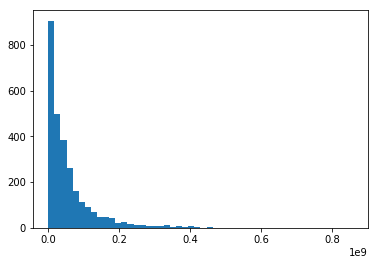

In [5]:
plt.hist(df['domesticgross'], bins=50)

(array([496., 401., 319., 318., 276.,  92., 144., 129.,  65., 100.,  70.,
         26.,  51.,  28.,  21.,  37.,  18.,  14.,  46.,  12.,  21.,  27.,
         11.,   8.,  22.,   5.,   5.,   3.,   4.,   0.,   7.,   2.,   0.,
          4.,   0.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([7.0000000e+03, 8.2188600e+06, 1.6430720e+07, 2.4642580e+07,
        3.2854440e+07, 4.1066300e+07, 4.9278160e+07, 5.7490020e+07,
        6.5701880e+07, 7.3913740e+07, 8.2125600e+07, 9.0337460e+07,
        9.8549320e+07, 1.0676118e+08, 1.1497304e+08, 1.2318490e+08,
        1.3139676e+08, 1.3960862e+08, 1.4782048e+08, 1.5603234e+08,
        1.6424420e+08, 1.7245606e+08, 1.8066792e+08, 1.8887978e+08,
        1.9709164e+08, 2.0530350e+08, 2.1351536e+08, 2.2172722e+08,
        2.2993908e+08, 2.3815094e+08, 2.4636280e+08, 2.5457466e+08,
        2.6278652e+08, 2.7099838e+08, 2.7921024e+08, 2.8742210e+08,
        2.9563396e+08, 3.0384582e+08, 3.120576

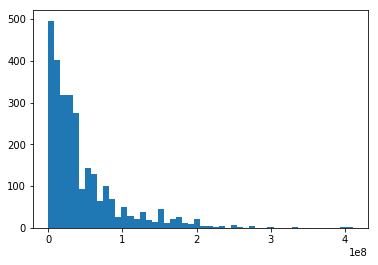

In [6]:
plt.hist(df['productionbudget'], bins=50)

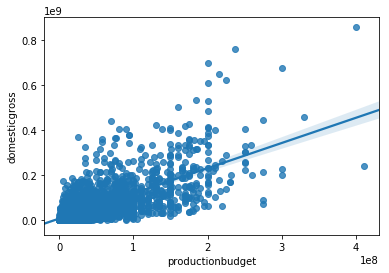

In [7]:
sns.regplot(data=df,x='productionbudget',y='domesticgross')

In [8]:
from sklearn import preprocessing

production_budget = df[['productionbudget']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df['prodbudget_scaled'] = min_max_scaler.fit_transform(production_budget)

(array([496., 401., 319., 318., 276.,  92., 144., 129.,  65., 100.,  70.,
         26.,  51.,  28.,  21.,  37.,  18.,  14.,  46.,  12.,  21.,  27.,
         11.,   8.,  22.,   5.,   5.,   3.,   4.,   0.,   7.,   2.,   0.,
          4.,   0.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

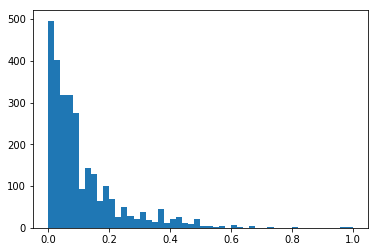

In [9]:
plt.hist(df['prodbudget_scaled'], bins=50)

ValueError: Could not interpret input 'startyear'

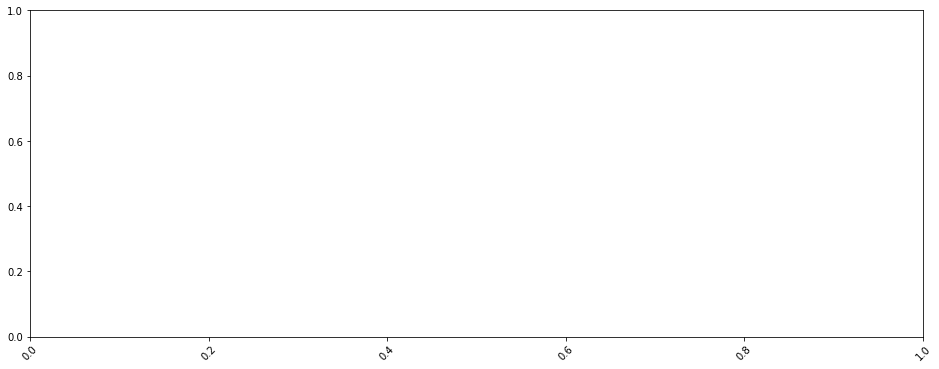

In [10]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='startyear')

In [64]:
df['releasedate']=pd.to_datetime(df['releasedate'])

In [65]:
df['week_number']=df['releasedate'].dt.week

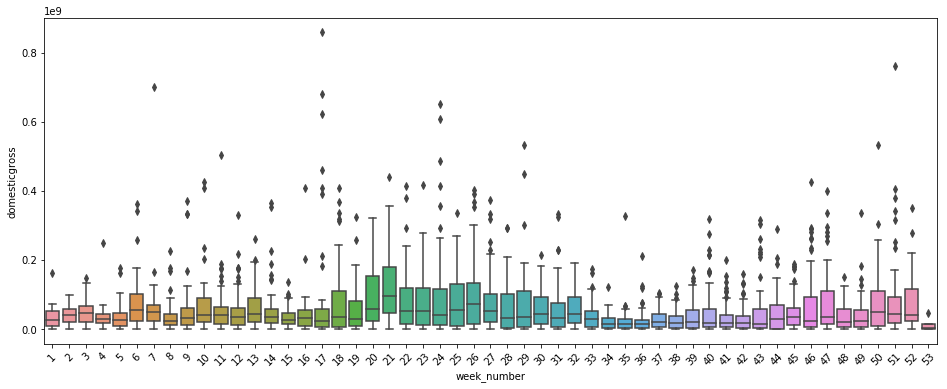

In [66]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='week_number')

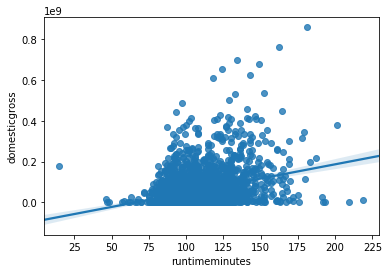

In [67]:
sns.regplot(data=df,x='runtimeminutes',y='domesticgross')

In [68]:
df.head()

,primarytitle,startyear,runtimeminutes,action,comedy,drama,adventure,biography,horror,crime,documentary,animation,romance,mystery,thriller,scifi,fantasy,family,threed,animallead,dysfunctionalfamily,africanamerican,marvelcomics,religious,talkinganimals,visualeffects,revenge,male_lead,matt_damon,nicolas_cage,owen_wilson,samuel_l_jackson,mark_wahlberg,adam_sandler,denzel_washington,dwayne_johnson,gerard_butler,george_clooney,ben_stiller,robert_de_niro,bruce_willis,will_smith,ben_affleck,will_ferrell,tom_hanks,tom_cruise,keanu_reeves,leonardo_dicaprio,jake_gyllenhaal,steve_carell,johnny_depp,matthew_mcconaughey,jason_statham,vin_diesel,robert_downey_jr,christian_bale,reese_witherspoon,russell_crowe,ice_cube,sandra_bullock,jackie_chan,cate_blanchett,brad_pitt,john_goodman,channing_tatum,jim_carrey,jack_black,colin_farrell,hugh_jackman,stephen_soderbergh,ridley_scott,steven_spielberg,ron_howard,tim_burton,clint_eastwood,shawn_levy,michael_bay,m_night_shyamalan,martin_scorsese,peter_jackson,guy_ritchie,david_gordon_green,christopher_nolan,todd_phillips,warner_bros,universal,fox,buena_vista,sony,paramount,releasedate,productionbudget,domesticgross,prodbudget_scaled,week_number
0,"10,000 BC",2008,109.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2008-03-07,105000000,94784201,0.255711,10
1,102 Dalmatians,2000,100.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2000-11-22,85000000,66941559,0.207001,47
2,10 Cloverfield Lane,2016,103.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-01-04,15000000,72082999,0.036515,1
3,10 Days in a Madhouse,2015,111.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-11-11,12000000,14616,0.029209,46
4,10th & Wolf,2006,107.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006-08-18,8000000,54702,0.019467,33


In [11]:
df[df['runtimeminutes'].isnull()]

,primarytitle,domesticgross,productionbudget,runtimeminutes,releasedate,g_rating,pg_rating,pg13_rating,r_rating,action,comedy,drama,adventure,biography,horror,crime,documentary,animation,romance,mystery,thriller,scifi,fantasy,family,threed,animallead,dysfunctionalfamily,africanamerican,marvelcomics,religious,talkinganimals,visualeffects,revenge,male_lead,matt_damon,nicolas_cage,owen_wilson,samuel_l_jackson,mark_wahlberg,adam_sandler,denzel_washington,dwayne_johnson,gerard_butler,george_clooney,ben_stiller,robert_de_niro,bruce_willis,will_smith,ben_affleck,will_ferrell,tom_hanks,tom_cruise,keanu_reeves,leonardo_dicaprio,jake_gyllenhaal,steve_carell,johnny_depp,matthew_mcconaughey,jason_statham,vin_diesel,robert_downey_jr,christian_bale,reese_witherspoon,russell_crowe,ice_cube,sandra_bullock,jackie_chan,cate_blanchett,brad_pitt,john_goodman,channing_tatum,jim_carrey,jack_black,colin_farrell,hugh_jackman,stephen_soderbergh,ridley_scott,steven_spielberg,ron_howard,tim_burton,clint_eastwood,shawn_levy,michael_bay,m_night_shyamalan,martin_scorsese,peter_jackson,guy_ritchie,david_gordon_green,christopher_nolan,todd_phillips,warner_bros,universal,fox,buena_vista,sony,paramount,prodbudget_scaled
64,Adam,2283291,3200000,NaN,2009-07-29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.007777
183,Arctic Dogs,5358602,50000000,NaN,2019-11-01,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.121758
1088,Joe,373375,4000000,NaN,2014-04-11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.009725
1129,Keeping It Real: The Adventures of Greg Walloch,1358,100000,NaN,2001-11-09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000227
1337,Midway,28890773,100000000,NaN,2019-11-07,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.243533
1458,Old Dogs,49492060,35000000,NaN,2009-11-25,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.085226
1967,Terminator: Dark Fate,53585077,185000000,NaN,2019-10-25,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.450551
2392,The Promise,8224288,90000000,NaN,2017-04-21,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.219178


In [13]:
median_runtime = df['runtimeminutes'].median()
df['runtimeminutes'].fillna(median_runtime, inplace=True)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   2.,
          1.,   1.,   3.,   7.,  31.,  83., 178., 251., 268., 266., 275.,
        288., 222., 177., 214., 130.,  88.,  77.,  52.,  49.,  28.,  19.,
         19.,  12.,   8.,  12.,   9.,   2.,   3.,   3.,   1.,   1.,   3.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 15.  ,  19.08,  23.16,  27.24,  31.32,  35.4 ,  39.48,  43.56,
         47.64,  51.72,  55.8 ,  59.88,  63.96,  68.04,  72.12,  76.2 ,
         80.28,  84.36,  88.44,  92.52,  96.6 , 100.68, 104.76, 108.84,
        112.92, 117.  , 121.08, 125.16, 129.24, 133.32, 137.4 , 141.48,
        145.56, 149.64, 153.72, 157.8 , 161.88, 165.96, 170.04, 174.12,
        178.2 , 182.28, 186.36, 190.44, 194.52, 198.6 , 202.68, 206.76,
        210.84, 214.92, 219.  ]),
 <a list of 50 Patch objects>)

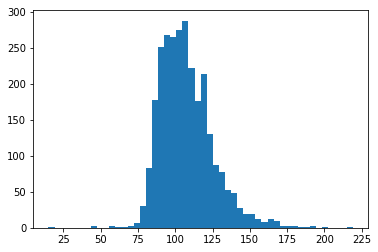

In [14]:
plt.hist(df['runtimeminutes'], bins=50)

In [15]:
runtime_minutes = df[['runtimeminutes']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df['runtime_scaled'] = min_max_scaler.fit_transform(runtime_minutes)

In [16]:
df_model = df.drop(['primarytitle','domesticgross','releasedate','runtimeminutes','productionbudget'], axis=1)
X = df_model.values
y = df['domesticgross'].values

In [17]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_rf = rf_model.predict(X_test)
rf_model.score(X_test,y_test)

0.5310477275805447

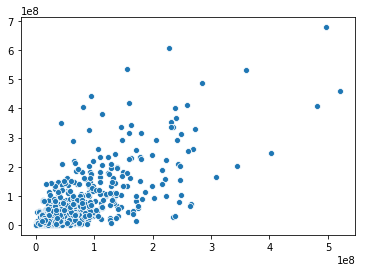

In [19]:
sns.scatterplot(y_rf,y_test)

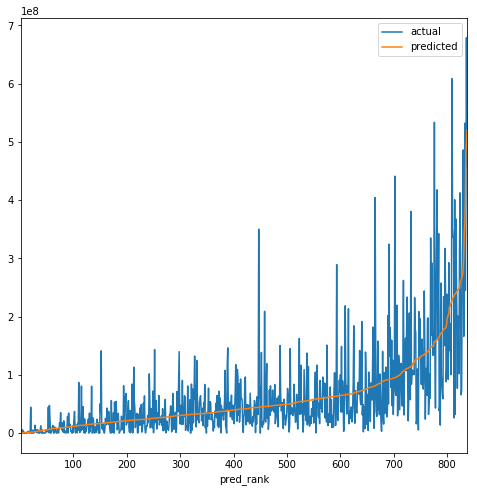

In [20]:
pred_actual_rf = pd.DataFrame({'predicted':y_rf,'actual':y_test})
pred_actual_rf['pred_rank'] = pred_actual_rf['predicted'].rank()
pred_actual_rf.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_rf.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_rf.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [21]:
from sklearn import metrics

print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y_test,y_rf)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y_test,y_rf)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test,y_rf))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_rf)))

Mean Absolute Error 34,399,098
Mean Squared Error 3,261,315,097,288,872
Root Mean Squared Error 57,107,925
Mean Value of Target 61,364,367
StDev of Target 83,393,472
R-Squared 0.531


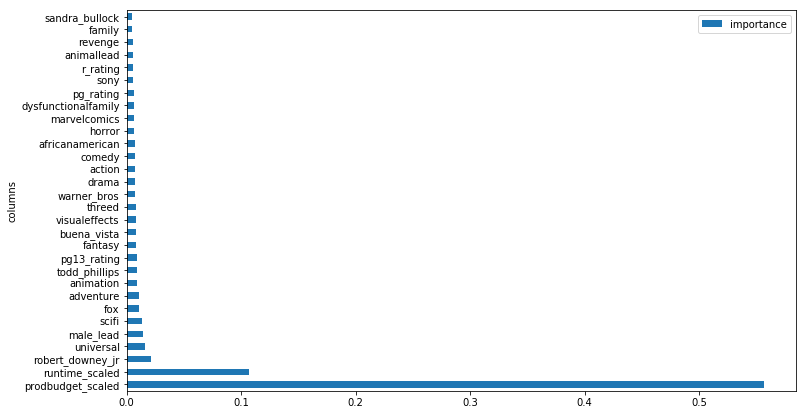

In [22]:
importance = pd.DataFrame({'columns':df_model.columns,'importance': rf_model.feature_importances_})
importance.sort_values('importance',ascending=False,inplace=True)
importance[:30].plot('columns','importance','barh',figsize=(12,7))

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
random_grid = {'bootstrap': [True, False],
               'max_depth': [5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4, 8, 10, 20],
               'min_samples_split': [2, 5, 10, 20],
               'n_estimators': [50, 100, 150, 200]}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

y_rf_random = rf_random.predict(X_test)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.7min finished


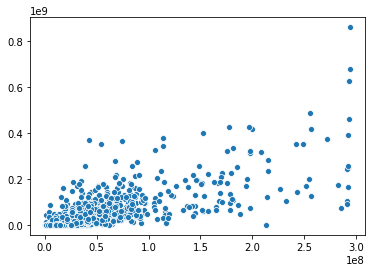

In [28]:
sns.scatterplot(y_rf_random,y_test)

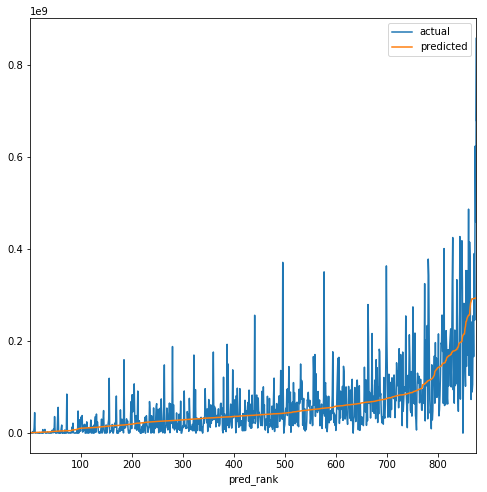

In [29]:
pred_actual_rf_random = pd.DataFrame({'predicted':y_rf_random,'actual':y_test})
pred_actual_rf_random['pred_rank'] = pred_actual_rf_random['predicted'].rank()
pred_actual_rf_random.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_rf_random.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_rf_random.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [30]:
from sklearn import metrics

print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y_test,y_rf_random)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y_test,y_rf_random)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test,y_rf_random))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_rf_random)))

Mean Absolute Error 35,164,729
Mean Squared Error 3,617,473,967,991,942
Root Mean Squared Error 60,145,440
Mean Value of Target 61,776,370
StDev of Target 84,402,373
R-Squared 0.492


In [31]:
from sklearn.linear_model import ElasticNet

en_model = ElasticNet(max_iter=1000, alpha=0.3, l1_ratio=0.8)
en_model.fit(X_train, y_train)
y_en = en_model.predict(X_test)

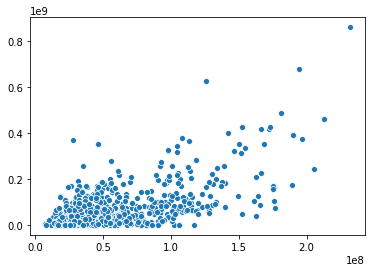

In [32]:
sns.scatterplot(y_en,y_test)

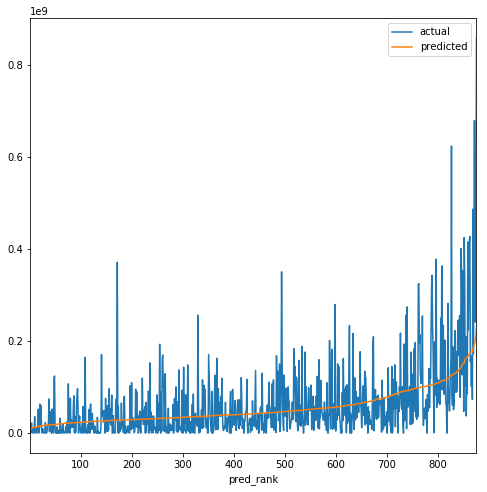

In [33]:
pred_actual_en = pd.DataFrame({'predicted':y_en,'actual':y_test})
pred_actual_en['pred_rank'] = pred_actual_en['predicted'].rank()
pred_actual_en.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_en.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_en.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [34]:
print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y_test,y_en)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y_test,y_en)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test,y_en))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_en)))

Mean Absolute Error 42,009,572
Mean Squared Error 4,666,001,426,923,209
Root Mean Squared Error 68,308,136
Mean Value of Target 61,776,370
StDev of Target 84,402,373
R-Squared 0.345


In [35]:
en_model_coefs = pd.DataFrame({'Feature':df_model.columns,'Coefficient':en_model.coef_})
en_model_coefs.sort_values('Coefficient',ascending=False,inplace=True)
en_model_coefs

,Feature,Coefficient
88,prodbudget_scaled,4.513685e+07
16,threed,2.976250e+07
4,adventure,2.753186e+07
23,visualeffects,2.211636e+07
85,buena_vista,2.198282e+07
90,runtime_scaled,2.168564e+07
9,animation,1.758665e+07
13,scifi,1.641353e+07
83,universal,1.413080e+07
20,marvelcomics,1.312174e+07


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
en = ElasticNet()
random_grid = {'alpha': [.1,.2,.3,.4,.5,.6,.7,.8,.9,1],
               'l1_ratio': [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1],
               'normalize': [True]}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
en_random.fit(X_train, y_train)

y_en_random = en_random.predict(X_test)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    8.8s finished


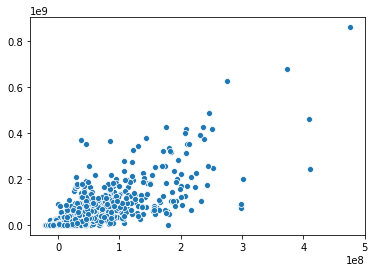

In [37]:
sns.scatterplot(y_en_random,y_test)

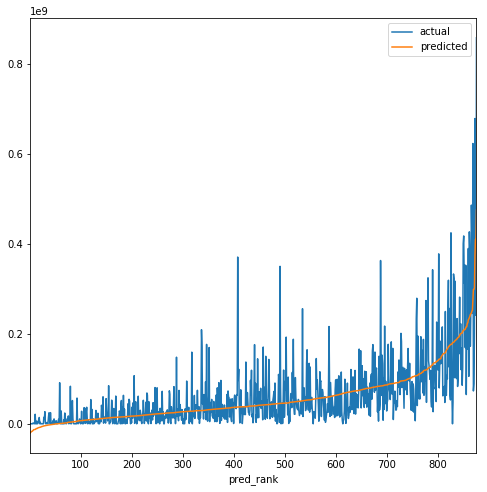

In [38]:
pred_actual_en_random = pd.DataFrame({'predicted':y_en_random,'actual':y_test})
pred_actual_en_random['pred_rank'] = pred_actual_en_random['predicted'].rank()
pred_actual_en_random.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_en_random.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_en_random.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [39]:
print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y_test,y_en_random)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y_test,y_en_random)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test,y_en_random))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_en_random)))

Mean Absolute Error 35,389,120
Mean Squared Error 3,321,219,465,268,074
Root Mean Squared Error 57,630,022
Mean Value of Target 61,776,370
StDev of Target 84,402,373
R-Squared 0.534


In [40]:
df[importance['columns'][:30]]

,prodbudget_scaled,week_number,runtime_scaled,startyear,animation,universal,male_lead,drama,marvelcomics,buena_vista,adventure,comedy,fantasy,action,visualeffects,scifi,christian_bale,fox,dysfunctionalfamily,todd_phillips,family,threed,crime,horror,revenge,sony,warner_bros,robert_downey_jr,animallead,jack_black
0,0.255711,10,0.460784,2008,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0.207001,47,0.416667,2000,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.036515,1,0.431373,2016,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.029209,46,0.470588,2015,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.019467,33,0.450980,2006,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0.043822,44,0.387255,2010,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0.048693,13,0.455882,2009,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
7,0.085226,3,0.563725,2018,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0.048693,42,0.583333,2013,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0.090097,17,0.406863,2004,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
df_model2 = df[importance['columns'][:30]]
X2 = df[importance['columns'][:30]].values
y2 = df['domesticgross'].values

In [42]:
from  sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.3, random_state=0)

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf2_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf2_model.fit(X2_train, y2_train)
y_rf2 = rf2_model.predict(X2_test)

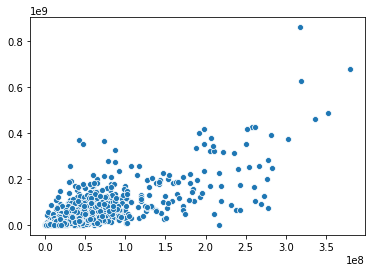

In [44]:
sns.scatterplot(y_rf2,y2_test)

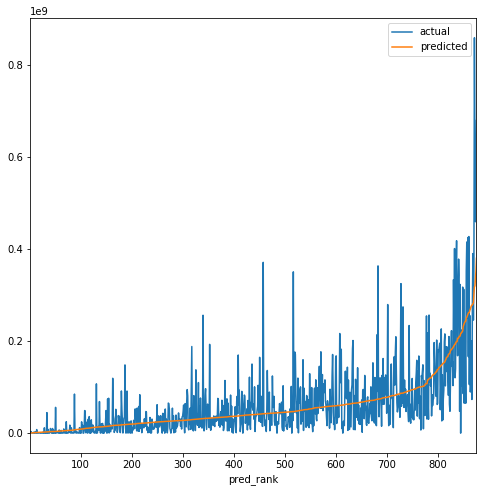

In [45]:
pred_actual_rf2 = pd.DataFrame({'predicted':y_rf2,'actual':y_test})
pred_actual_rf2['pred_rank'] = pred_actual_rf2['predicted'].rank()
pred_actual_rf2.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_rf2.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_rf2.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [46]:
from sklearn import metrics

print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y2_test,y_rf2)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y2_test,y_rf2)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y2_test,y_rf2))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_rf2)))

Mean Absolute Error 34,680,172
Mean Squared Error 3,335,580,663,020,889
Root Mean Squared Error 57,754,486
Mean Value of Target 61,776,370
StDev of Target 84,402,373
R-Squared 0.532


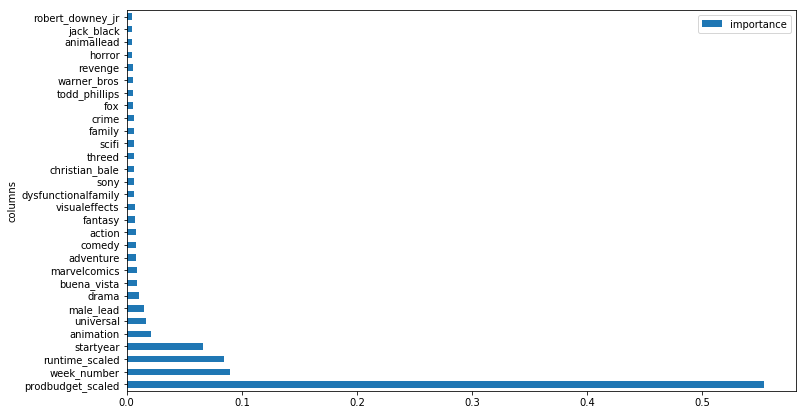

In [47]:
importance2 = pd.DataFrame({'columns':df_model2.columns,'importance': rf2_model.feature_importances_})
importance2.sort_values('importance',ascending=False,inplace=True)
importance2.plot('columns','importance','barh',figsize=(12,7))

In [48]:
from sklearn.linear_model import ElasticNet

en2_model = ElasticNet(max_iter=1000, alpha=0.3, l1_ratio=0.8)
en2_model.fit(X2_train, y2_train)
y_en2 = en2_model.predict(X2_test)

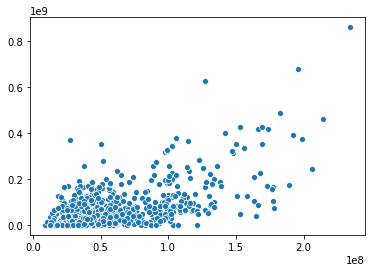

In [49]:
sns.scatterplot(y_en2,y2_test)

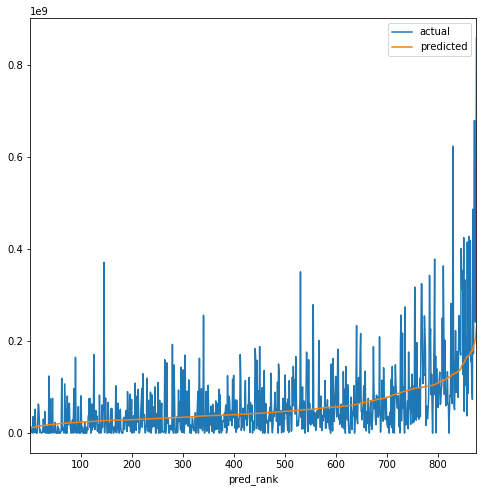

In [50]:
pred_actual_en2 = pd.DataFrame({'predicted':y_en2,'actual':y2_test})
pred_actual_en2['pred_rank'] = pred_actual_en2['predicted'].rank()
pred_actual_en2.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_en2.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_en2.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [51]:
print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y2_test,y_en2)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y2_test,y_en2)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y2_test,y_en2))))
print('Mean Value of Target', "{:,.0f}".format(y2_test.mean()))
print('StDev of Target', "{:,.0f}".format(y2_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_en2)))

Mean Absolute Error 42,368,116
Mean Squared Error 4,685,798,062,853,934
Root Mean Squared Error 68,452,889
Mean Value of Target 61,776,370
StDev of Target 84,402,373
R-Squared 0.342


In [52]:
en2_model_coefs = pd.DataFrame({'Feature':df_model2.columns,'Coefficient':en2_model.coef_})
en2_model_coefs.sort_values('Coefficient',ascending=False,inplace=True)
en2_model_coefs

,Feature,Coefficient
0,prodbudget_scaled,4.593807e+07
21,threed,3.018631e+07
10,adventure,2.837239e+07
14,visualeffects,2.243609e+07
2,runtime_scaled,2.186484e+07
9,buena_vista,2.174915e+07
4,animation,1.798519e+07
15,scifi,1.708175e+07
5,universal,1.402749e+07
8,marvelcomics,1.334813e+07


In [53]:
#import pickle

#Dump a Scikit-Learn Fitted Estimator to disk
#with open(path, 'wb') as f:
#    pickle.dump(model,f)

#Load a Scikit-Learn Fitted Estimator from disk
#with open(path, 'rb') as f:
#    model = pickle.load(f)
